### PHYS 310 in-class fitting exercise #2

Example of fitting a <b>non-linear</b> model. This notebook uses  `curve_fit()` from the `optimize` submodule of `scipy`.  (This function can be used to fit linear and non-linear models. When used
with a non-linear model, as in this notebook, initial estimates of the fit parameters are required
in order to converge on the desired minimum in $\chi^2$ space.)

Marty Ligare, August 2020

modified by Katharina Vollmayr-Lee, February 2022

In [1]:
import numpy as np
from scipy import optimize

import urllib

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Following is an Ipython magic command that puts figures in notebook.
%matplotlib notebook
        
# M.L. modifications of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
mpl.style.use('classic') 
plt.rc('figure', figsize = (6, 4.5)) # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True) # Adjusts supblot params for new size

#### Define function
This function is parametrized in terms of the wavelength `wl` and not the wavenumber. 
It's easy to estimate the wavelength by simple inspection of the graph, without
additional calculation.

In [4]:
def f(x,a,wl,ph):
    '''Cosine function with three fit parameters: a (amplitude), wl (wavelength),
    and ph (phase)'''
    return a*np.cos(2*np.pi*x/wl + ph)

#### Load data from URL
We could download the data file to a local directory, and import it using `np.loadtxt`, but 
let's skip the intermediate step and load it directly to the notebook.

Each row in file gives information on single data point, $x_i$, $y_i$, $\alpha_i$. The option 
`unpack = True` takes transpose of the data file array so that all values of `x` are in a single 
array, and similarly for `y` and `u` (the uncertainty).  Notice that by default `np.loadtxt()` treats
`#` as the comment character.

In [5]:
link = 'http://www.eg.bucknell.edu/~phys310/skills/data_analysis/b.dat'
fh = urllib.request.urlopen(link)
xdata, ydata, udata = np.loadtxt(fh, unpack=True)
print(xdata)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4. ]


#### Load data from File
Since for most labs you will have a file with your data instead of the file of a URL link, let us practice here how to use `np.loadtext` directly on a file. So download from the Phys 310 webpage the file `a.dat` into your local directory. Next we import it using `np.loadtxt`.

Each row in this file gives information on single data point, $x_i$, $y_i$, $\alpha_i$. The option 
`unpack = True` takes transpose of the data file array so that all values of `x` are in a single 
array, and similarly for `y` and `u` (the uncertainty).  Notice that by default `np.loadtxt()` treats
`#` as the comment character.

In [6]:
xdata, ydata, udata = np.loadtxt("b.dat", unpack=True)
#print(xdata,ydata,udata)

#### Plot Raw Data

<IPython.core.display.Javascript object>


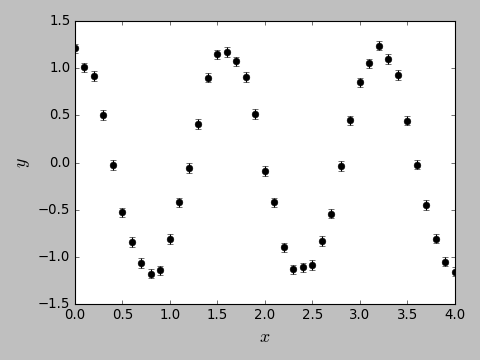

In [8]:
plt.figure()
plt.errorbar(xdata,ydata,udata, fmt='ok')
plt.xlabel('$x$')
plt.ylabel('$y$');

#### Initial estimates of amplitude (`a`), wavelength (`wl`), and phase (`ph`)
Required for fitting of non-linear model

In [9]:
p0 = 1.2, 1.7, 0  # a, wl, ph estimates
print(p0)

(1.2, 1.7, 0)


#### Check that your initial parameter guess is fine

<IPython.core.display.Javascript object>


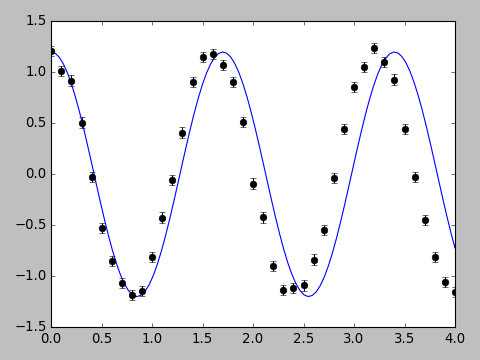

In [10]:
plt.figure()
plt.errorbar(xdata,ydata,udata, fmt='ok')
xc = np.linspace(0,4,100)
#plt.plot(xc, f(xc,1.2,1.7,0));
plt.plot(xc, f(xc,*p0))

#### Perform the fit

In [11]:
popt, pcov = optimize.curve_fit(f,xdata,ydata,p0, sigma=udata, absolute_sigma=True)
print(popt)
for i in range(len(popt)):
    print(np.sqrt(pcov[i,i]))

[1.1966005  1.60282965 0.00692951]
0.010979964610279402
0.0033595157745851434
0.01891133307595432


#### Best-fit parameters
+ $a = 1.20 \pm 0.01$
+ $b = 1.602 \pm 0.003$
+ $c = 0.00 \pm 0.02$ 

#### Plot data with fit line

<IPython.core.display.Javascript object>


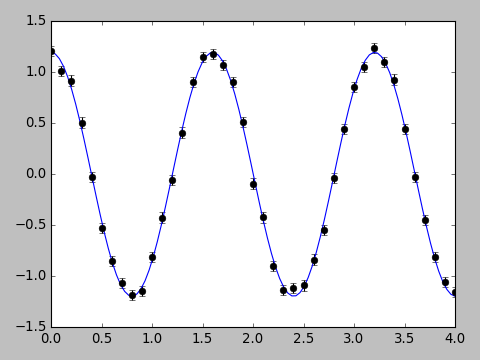

In [12]:
plt.figure()
plt.errorbar(xdata,ydata,udata, fmt='ok')
xc = np.linspace(0,4,100)
plt.plot(xc, f(xc,*popt));

#### Calculate and plot residuals

$$ r_i = y_i - f(x_i) $$

In [13]:
r = ydata - f(xdata,*popt)

<IPython.core.display.Javascript object>


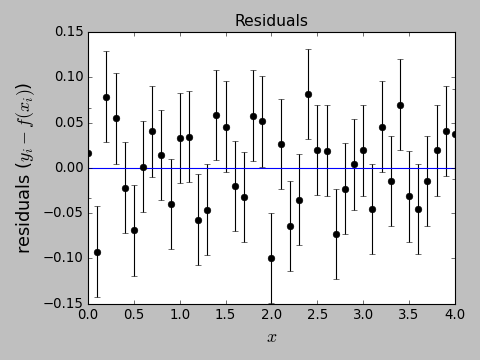

In [14]:
plt.figure()
plt.errorbar(xdata,r,udata, fmt='ko')
plt.axhline(0)
plt.xlabel('$x$')
plt.ylabel('residuals ($y_i - f(x_i)$)')
plt.title('Residuals');

#### Calculate $\chi^2$

$$ \chi^2 = \sum_i \frac{(y_i - f(x_i))^2}{\alpha_i^2}   $$



In [15]:
chisq = np.sum(r**2/udata**2)
print(chisq, len(r))

37.07970825696804 41


The value of $\chi^2$ is approximately equal to the number of data points, 
suggesting the data is consistent with the model.

#### Version information

+ %version_information is an IPython magic extension for showing version information for dependency modules in a notebook; 

+ See `https://github.com/jrjohansson/version_information`

+ `%version_information` is available on Bucknell computers on the linux network.  You can easily install it on
any computer.

In [16]:
%load_ext version_information

In [15]:
version_information numpy, scipy, matplotlib

Software versions
Python 3.7.8 64bit [GCC 7.5.0]
IPython 7.17.0
OS Linux 3.10.0 1160.15.2.el7.x86_64 x86_64 with redhat 7.5 Maipo
numpy 1.19.1
scipy 1.5.0
matplotlib 3.3.0
Thu Feb 25 12:42:59 2021 EST